In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns # used for plotting 

df = pd.read_excel("data/calories.xlsx") #require openpyxl in virtual environment
df.head() # see the first n rows of DataFrame, n = 5 by default

,FoodCategory,FoodItem,per100grams,Cals_per100grams,KJ_per100grams
0,CannedFruit,Applesauce,100g,62 cal,260 kJ
1,CannedFruit,Canned Apricots,100g,48 cal,202 kJ
2,CannedFruit,Canned Blackberries,100g,92 cal,386 kJ
3,CannedFruit,Canned Blueberries,100g,88 cal,370 kJ
4,CannedFruit,Canned Cherries,100g,54 cal,227 kJ


In [ ]:
df["FoodCategory"].unique() 

# Data cleaning

In [19]:
df.columns

Index(['FoodCategory', 'FoodItem', 'per100', 'Calories', 'kJ'], dtype='object')

In [34]:
df = df.rename({"Cals_per100grams": "Calories", "per100grams": "per100", "KJ_per100grams": "KJ"}, axis="columns")
df.head()

,FoodCategory,FoodItem,per100,Calories,kJ
0,CannedFruit,Applesauce,100g,62,260 kJ
1,CannedFruit,Canned Apricots,100g,48,202 kJ
2,CannedFruit,Canned Blackberries,100g,92,386 kJ
3,CannedFruit,Canned Blueberries,100g,88,370 kJ
4,CannedFruit,Canned Cherries,100g,54,227 kJ


In [ ]:
df["Calories"] = df["Calories"].str[:-3].astype(int)
df.head()

In [42]:
df["per100"].value_counts()

per100
100g     1802
100ml     423
Name: count, dtype: int64

In [43]:
liquids = df[df["per100"] == "100ml"]
liquids.head(2)

,FoodCategory,FoodItem,per100,Calories,kJ
409,Milk&DairyProducts,Almond Milk,100ml,17,71 kJ
410,Milk&DairyProducts,Buttermilk,100ml,62,260 kJ


In [44]:
solids = df[df["per100"] == "100g"]
solids.head(2)

,FoodCategory,FoodItem,per100,Calories,kJ
0,CannedFruit,Applesauce,100g,62,260 kJ
1,CannedFruit,Canned Apricots,100g,48,202 kJ


### Find out top 5 categorist of calories

In [46]:
solids_sorted = solids.sort_values(by="Calories", ascending=False) # sorting descending by Calories column
solids_top5 = solids_sorted.iloc[:5] # Python-way slicing
solids_top5

,FoodCategory,FoodItem,per100,Calories,kJ
1621,Soups,Goulash,100g,1009,4238 kJ
1761,Oils&Fats,Lard,100g,902,3788 kJ
528,Beef&Veal,Beef Tallow,100g,902,3788 kJ
1756,Oils&Fats,Goose Fat,100g,898,3772 kJ
599,Meat,Chicken Fat,100g,898,3772 kJ


In [47]:
liquids_top5 = liquids.sort_values(by="Calories", ascending=False).head()
liquids_top5

,FoodCategory,FoodItem,per100,Calories,kJ
1751,Oils&Fats,Cod Liver Oil,100ml,1000,4200 kJ
1808,VegetableOils,Wheat Germ Oil,100ml,929,3902 kJ
1800,VegetableOils,Salmon Oil,100ml,911,3826 kJ
1789,VegetableOils,Menhaden Oil,100ml,911,3826 kJ
1759,Oils&Fats,Herring Oil,100ml,902,3788 kJ


In [48]:
top5_category = df.groupby("FoodCategory")["Calories"].median().sort_values(
    ascending=False
).reset_index().iloc[:5]

top5_category

,FoodCategory,Calories
0,VegetableOils,884.0
1,Oils&Fats,883.0
2,Nuts&Seeds,534.0
3,Candy&Sweets,448.0
4,"Oatmeal,Muesli&Cereals",373.5


/var/folders/_6/t8g0_t_n1_9bcmhw9_c95wnc0000gn/T/ipykernel_42874/2083033668.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/var/folders/_6/t8g0_t_n1_9bcmhw9_c95wnc0000gn/T/ipykernel_42874/2083033668.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/var/folders/_6/t8g0_t_n1_9bcmhw9_c95wnc0000gn/T/ipykernel_42874/2083033668.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


FileNotFoundError: [Errno 2] No such file or directory: '../figures/Calories.png'

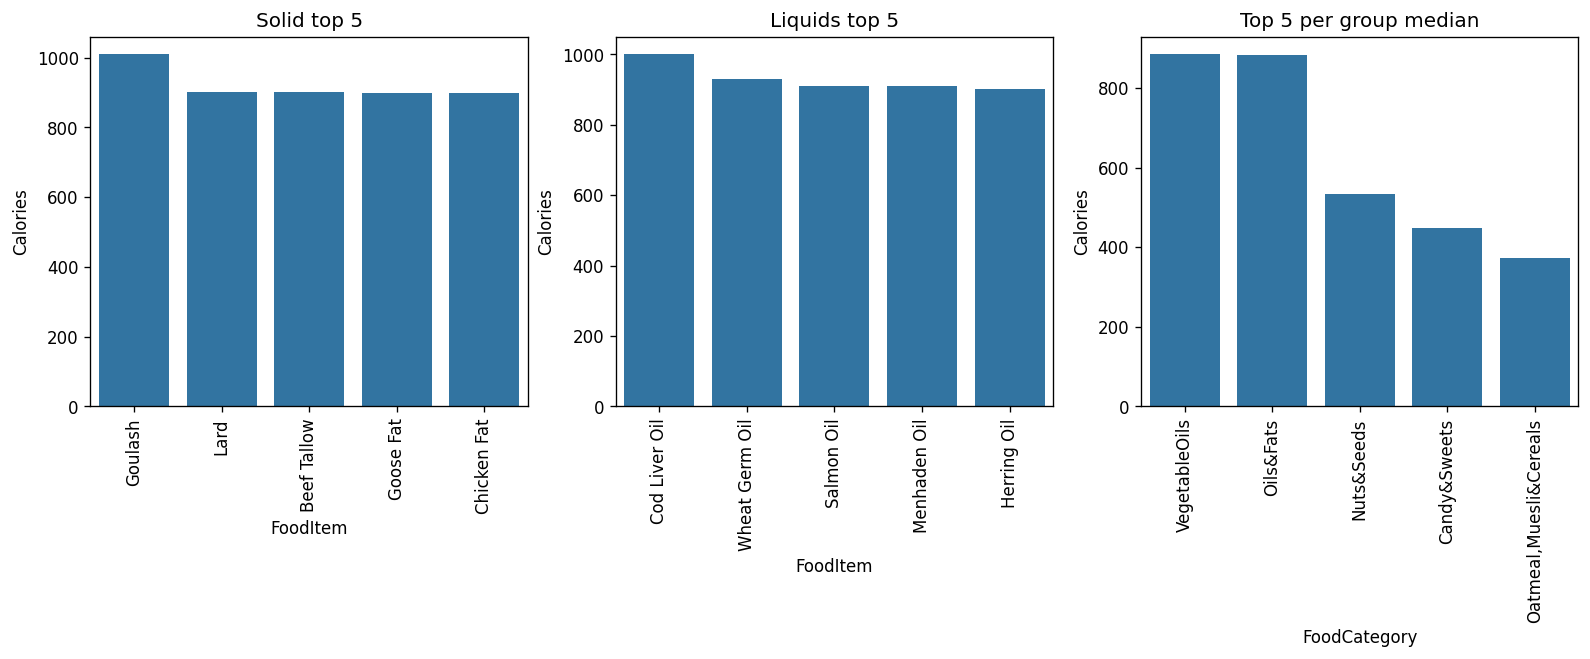

In [49]:
# visualization using seaborn
fig, axes = plt.subplots(1,3, dpi=120, figsize=(16,4))

titles = ["Solid top 5", "Liquids top 5", "Top 5 per group median"]
data_frames = [solids_top5, liquids_top5, top5_category]
x_columns = ["FoodItem", "FoodItem", "FoodCategory"]

for ax, data, title, x_column in zip(axes, data_frames, titles, x_columns): 
    sns.barplot(data = data, x=x_column, y="Calories", ax = ax)
    ax.set(title=title)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.savefig("../figures/Calories.png", facecolor="white", bbox_inches="tight")